# principal-component-analysis (PCA)

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from eli5.sklearn import PermutationImportance
import eli5

/Users/archydeberker/anaconda3/envs/armoury/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/archydeberker/anaconda3/envs/armoury/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
cali_housing = datasets.california_housing.fetch_california_housing()
print(cali_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [3]:
cali_housing_df = pd.DataFrame(cali_housing.data, columns=cali_housing.feature_names)
cali_housing_df = pd.concat((cali_housing_df, pd.DataFrame(cali_housing.target, columns=['price'])), axis=1)

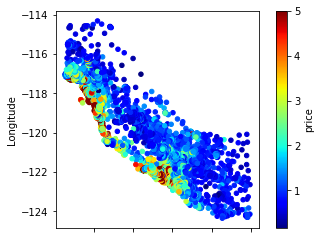

In [26]:
geo_df = cali_housing_df[['Latitude', 'Longitude', 'price']].copy()
ax = cali_housing_df.plot.scatter(x='Latitude', y='Longitude', c='price', cmap='jet')
ax.axes.set_aspect('equal')

In [7]:
from sklearn.decomposition.pca import PCA

In [8]:
pc = PCA(2)

In [9]:
principal_components = pc.fit_transform(geo_df[['Latitude', 'Longitude']].values)

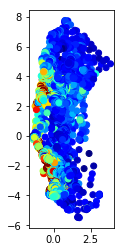

In [27]:
ax = plt.scatter(principal_components[:,1],
           principal_components[:,0],
           c=cali_housing_df['price'],
           cmap='jet')

ax.axes.set_aspect('equal')